In [5]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import json
import time
import emoji
from datetime import datetime, date
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
warnings.filterwarnings('ignore')
from html_table_parser import HTMLTableParser

pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = (16,12)
plt.rcParams['font.size'] = 17
plt.rcParams['figure.facecolor'] = "#00000000"

In [6]:
base_url = "https://coinmarketcap.com/"

In [7]:
# Getting listed coin for a single page
def get_coins_data(url):
    coin_id = []
    coin_names = []
    
    
    site = requests.get(url)

    soup_get = BeautifulSoup(site.content, 'html.parser')
    data = soup_get.find('script', id = "__NEXT_DATA__", type = 'application/json')

    coin_data = json.loads(data.contents[0])

    listings = coin_data['props']['initialState']['cryptocurrency']['listingLatest']['data']


    for crypto in listings:
        coin_id.append(crypto['id'])
        coin_names.append((crypto['slug'], crypto['symbol']))
        
    return coin_id, coin_names

# Getting the names of coins for each listing page
def getListedcoins(url = base_url, pages = 1):
    coins = {}
    
    if pages > 1:
        for page in range(pages):
            url = base_url + str(page+1)
            coin_id, coin_names = get_coins_data(url)
            for idx, names in zip(coin_id, coin_names):
                coins[(str(idx))] = names
                
    else:
        url = base_url
        coin_id, coin_names = get_coins_data(url)
        for idx, names in zip(coin_id, coin_names):
            coins[(str(idx))] = names
            
    return coins

In [8]:
azsite = "https://www.finder.com/cryptocurrency-glossary"

site = requests.get(azsite)

get_site = BeautifulSoup(site.content, 'html.parser')



In [9]:
get_table = get_site.find()
# table, attrs = {'class' : 'luna-table luna-table--responsiveList'}

table = get_table.tbody.find_all('td')

i=0
terms = []
descriptions = []

while i < len(table):
    term, descr = table[i], table[i+1]
    terms.append(term.text)
    descriptions.append(descr.text)
    i += 2

columns = [i.text for  i in get_table.thead.find_all('th')]

data_descr = pd.DataFrame( columns = columns)
data_descr['Term'] = terms
data_descr['Description'] = descriptions

data_descr.head(3)

,Term,Description
0,51% Attack,If more than half the computer power on a netw...
1,Addresses,Every cryptocurrency coin has a unique address...
2,Airdrop,This is a marketing campaign that refers to th...


In [10]:
from urllib.request import urlopen

azsite = "https://coinmarketcap.com/alexandria/glossary"
site = urlopen(azsite)

get_sites = BeautifulSoup(site, 'html.parser')


In [11]:
get_list = get_sites.findAll('h3')
coincap_terms = [term.text.split('(')[0] for term in get_list]

In [12]:
crypto_terms = set(coincap_terms)
len(crypto_terms)

358

In [13]:
data_descr

,Term,Description
0,51% Attack,If more than half the computer power on a netw...
1,Addresses,Every cryptocurrency coin has a unique address...
2,Airdrop,This is a marketing campaign that refers to th...
3,Algorithm,Mathematic instructions coded into and impleme...
4,All Time High,The highest price ever achieved by a cryptocur...
...,...,...
176,Wallet,A wallet is defined by a unique code that repr...
177,Whale,A term used to describe extremely wealthy inve...
178,Whitelist,"Prior to an ICO, interested parties can sign u..."
179,White Paper,"A detailed explanation of a cryptocurrency, de..."


In [14]:
coins = getListedcoins(pages =10)

In [15]:
name = [i[0] for i in coins.values()]
code = [i[1] for i in coins.values()]


coin_df = pd.DataFrame({'coin_id': coins.keys(),
                       'coin_name': name,
                       'coin_tag': code})

In [16]:
file_path = r"C:\Users\PAVILLION\Desktop\Data Science and projects\Telegram analyse\result.json"

file = open(file_path, encoding = "utf-8")
data = json.load(file)

In [17]:
crypto_df = pd.DataFrame(data['messages'])

In [18]:
crypto_df.head()

,id,type,date,actor,actor_id,action,title,text,members,from,from_id,edited,file,thumbnail,media_type,sticker_emoji,width,height,reply_to_message_id,photo,forwarded_from,mime_type,duration_seconds,message_id,inviter,poll,via_bot,contact_information,contact_vcard,saved_from,performer
0,1,service,2018-03-16T11:19:09,Binance Nigeria,9.789260e+09,migrate_from_group,Binance Nigeria,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,service,2018-03-16T12:17:33,Diego,4.735631e+09,invite_members,NaN,,[Cryptic Zombie],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,message,2018-03-16T18:29:53,NaN,NaN,NaN,NaN,Nice,NaN,Cryptic Zombie,4.684320e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,service,2018-03-16T18:33:48,Cryptic Zombie,4.684320e+09,invite_members,NaN,,[David],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,service,2018-03-16T18:35:55,Cryptic Zombie,4.684320e+09,invite_members,NaN,,[Toluwalope Oyefeso],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
crypto_df.type.value_counts()

message    339354
service      1383
Name: type, dtype: int64

In [20]:
crypto_df = crypto_df[crypto_df['type'] == 'message']

In [21]:
crypto_df.head()

,id,type,date,actor,actor_id,action,title,text,members,from,from_id,edited,file,thumbnail,media_type,sticker_emoji,width,height,reply_to_message_id,photo,forwarded_from,mime_type,duration_seconds,message_id,inviter,poll,via_bot,contact_information,contact_vcard,saved_from,performer
2,4,message,2018-03-16T18:29:53,NaN,NaN,NaN,NaN,Nice,NaN,Cryptic Zombie,4.684320e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,9,message,2018-03-16T18:40:21,NaN,NaN,NaN,NaN,Cool,NaN,None,4.728345e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,15,message,2018-04-01T10:05:23,NaN,NaN,NaN,NaN,Nice,NaN,Cryptic Zombie,4.684320e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,16,message,2018-04-01T10:05:54,NaN,NaN,NaN,NaN,We don dey grow smal smal,NaN,Cryptic Zombie,4.684320e+09,2018-04-01T10:06:14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,17,message,2018-04-01T10:06:01,NaN,NaN,NaN,NaN,,NaN,Cryptic Zombie,4.684320e+09,NaN,(File not included. Change data exporting sett...,(File not included. Change data exporting sett...,sticker,😜,256.0,512.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
crypto_df.isna().sum()

id                          0
type                        0
date                        0
actor                  339354
actor_id               339354
action                 339354
title                  339350
text                        0
members                339354
from                    14141
from_id                     0
edited                 334191
file                   331261
thumbnail              331721
media_type             331269
sticker_emoji          335399
width                  322103
height                 322103
reply_to_message_id    149966
photo                  330184
forwarded_from         336805
mime_type              335262
duration_seconds       335270
message_id             339354
inviter                339354
poll                   339336
via_bot                339212
contact_information    339351
contact_vcard          339351
saved_from             338976
performer              339350
dtype: int64

In [23]:
crypto_df.media_type.value_counts()

sticker          4001
animation        3450
video_file        627
audio_file          5
video_message       2
Name: media_type, dtype: int64

In [24]:
# Filling up users with no username with their supposedly unique group_id

crypto_df['from'] = crypto_df.apply(lambda x : x['from_id'] if not x['from'] else x['from'], axis = 1)

In [25]:
crypto_df = crypto_df[['id', 'date','text','from', 'media_type', 'reply_to_message_id']]

crypto_df.head()

,id,date,text,from,media_type,reply_to_message_id
2,4,2018-03-16T18:29:53,Nice,Cryptic Zombie,NaN,NaN
7,9,2018-03-16T18:40:21,Cool,4728344747.0,NaN,NaN
11,15,2018-04-01T10:05:23,Nice,Cryptic Zombie,NaN,NaN
12,16,2018-04-01T10:05:54,We don dey grow smal smal,Cryptic Zombie,NaN,NaN
13,17,2018-04-01T10:06:01,,Cryptic Zombie,sticker,NaN


In [26]:
media_df = crypto_df[crypto_df['media_type'].notna()]

# Removing robot/automated generated messages

crypto_df = crypto_df.loc[~crypto_df['from'].isin(['Combot', 'Binance FAQ Bot', 'Binance Community Bot'])]

In [27]:
media_df.shape

(8085, 6)

In [28]:
print('Messages containing a form of media file: ')
print()
display(media_df.head())
print("\nMessages containing purely text:")
print()
display(crypto_df.head())

Messages containing a form of media file: 



,id,date,text,from,media_type,reply_to_message_id
13,17,2018-04-01T10:06:01,,Cryptic Zombie,sticker,NaN
17,21,2018-04-01T10:07:52,,Cryptic Zombie,sticker,NaN
21,25,2018-04-01T10:08:33,,Cryptic Zombie,sticker,NaN
28,32,2018-04-01T10:13:30,,Cryptic Zombie,sticker,NaN
31,35,2018-04-01T10:14:29,,Cryptic Zombie,sticker,NaN



Messages containing purely text:



,id,date,text,from,media_type,reply_to_message_id
2,4,2018-03-16T18:29:53,Nice,Cryptic Zombie,NaN,NaN
7,9,2018-03-16T18:40:21,Cool,4728344747.0,NaN,NaN
11,15,2018-04-01T10:05:23,Nice,Cryptic Zombie,NaN,NaN
12,16,2018-04-01T10:05:54,We don dey grow smal smal,Cryptic Zombie,NaN,NaN
13,17,2018-04-01T10:06:01,,Cryptic Zombie,sticker,NaN


In [29]:
types = []
for text in crypto_df['text']:
    if not type(text) == list:
        pass
    else:
        for content in text:
            if type(content) == dict:
                types.append(content['type'])

In [30]:

sub = list(filter(lambda x: (type(x) == list), crypto_df['text']))


def type_samples(text_type):
    for text in sub:
        for content in text:
            if type(content) == dict:
                if content['type'] == text_type:
                    print("Content format for type:", text_type)
                    print(text)
                    return
                
#for text_type in set(types):
#    type_samples(text_type)
#    print('\n\n')

In [31]:
types = []
for text in crypto_df['text']:
    if type(text) == list:
        for content in text:
            if type(content) == dict:
                types.append(content['type'])

In [32]:
remove = {'bank_card',
 'bot_command',
 'cashtag',
 'code',
 'email',
 'phone',
 'pre',}

def remove_tags(text):
    if type(text) == list:
        string = ''
        for content in text:
            if type(content) == dict:
                if content['type'] in remove:
                    string += ''
                else:
                    string+= ' ' + content['text']
            else:
                string += ' ' + content
                
        text = string
    return text

crypto_df['text'] = crypto_df['text'].apply(remove_tags)
crypto_df['text'] = crypto_df['text'].apply(str.strip)
crypto_df['text'] = crypto_df['text'].apply(lambda text: '' if (text in emoji.UNICODE_EMOJI) & (len(text)<6) else text)


In [33]:
print('Top 30 most offered comment or response')
top_comments = list(crypto_df['text'].value_counts().to_dict().keys())[:30]
#top_comments
top_comments = [i.lower() for i in top_comments]

for i in ['nice', 'nyc' 'cool', 'kul', "good morning", "okay thanks", 'hmmm', 'alright', 'uwc', 
          'wow', 'chai', 'good morning guys', 'hello guys', 'hello', 'thanks',
         'thank you', 'okay', 'ok', 'ok thanks', "you're welcome", 'hi','hello everyone', 'good']:
    top_comments.append(i)

Top 30 most offered comment or response


In [34]:
crypto_df = crypto_df.loc[~((crypto_df['text'].str.len() < 4) & (crypto_df.reply_to_message_id.isna()))]
crypto_df = crypto_df[~crypto_df['text'].str.lower().isin(top_comments)]
crypto_df.shape

(295260, 6)

In [35]:
list(crypto_df['text'].value_counts().to_dict().keys())[:30]

['Nope',
 'How?',
 'I swear',
 'Yes.',
 'Done',
 'Thanks bro',
 'Scam',
 '👍👍',
 'True',
 'Binance',
 'Dm',
 'Lmao',
 'Why?',
 'Yes sir',
 '-',
 'Yh',
 '🤣🤣🤣',
 'Yup',
 'Thanks boss',
 'DYOR',
 'Really',
 'Hmm',
 'Yep',
 'Yes you can',
 'No.',
 'https://www.binance.vision/playlists/binance-beginners-guide',
 '🤣🤣',
 'Cool',
 '+1',
 'Me too']

In [36]:
crypto_df['date'] = pd.to_datetime(crypto_df['date'])

crypto_df['chat_date'] = crypto_df['date'].dt.date
crypto_df['chat_time'] = crypto_df['date'].dt.time
crypto_df['chat_year'] = crypto_df['date'].dt.strftime('%Y')
crypto_df['chat_month'] = crypto_df['date'].dt.strftime('%b')
crypto_df['chat_day'] = crypto_df['date'].dt.strftime('%a')
crypto_df['chat_hour'] = crypto_df['date'].dt.hour


crypto_df.head()

,id,date,text,from,media_type,reply_to_message_id,chat_date,chat_time,chat_year,chat_month,chat_day,chat_hour
7,9,2018-03-16 18:40:21,Cool,4728344747.0,NaN,NaN,2018-03-16,18:40:21,2018,Mar,Fri,18
12,16,2018-04-01 10:05:54,We don dey grow smal smal,Cryptic Zombie,NaN,NaN,2018-04-01,10:05:54,2018,Apr,Sun,10
14,18,2018-04-01 10:07:16,Stop texting inside the Church😬,David,NaN,NaN,2018-04-01,10:07:16,2018,Apr,Sun,10
16,20,2018-04-01 10:07:49,Na ur shurch i go,Cryptic Zombie,NaN,NaN,2018-04-01,10:07:49,2018,Apr,Sun,10
18,22,2018-04-01 10:08:06,Hehehe,Cryptic Zombie,NaN,NaN,2018-04-01,10:08:06,2018,Apr,Sun,10


In [37]:

def response(row):
    if str(row['reply_to_message_id']) == 'nan':
        return np.nan
        
    else:
        try:
            ask_time = crypto_df[crypto_df['id'] == row['reply_to_message_id']]['chat_time'].iloc[0]
            response_time = datetime.combine(date.min,row['chat_time']) - datetime.combine(date.min,ask_time)
            return response_time.total_seconds()
        except:
            return np.nan
        
        
        
crypto_df['response_time'] = crypto_df.apply(response,axis =1)

# I want to believe that no one replies to a future message. Hence,
crypto_df['response_time'] = crypto_df['response_time'].apply(lambda x: 0 if x<0 else x)


In [38]:
# I think it is best I trim data of chats from 2018

crypto_df = crypto_df[crypto_df['chat_year'] != 2018].reset_index(drop = True)

In [39]:
hr = [0,4,8,12,16,20,24]
nt = ['Late Night', 'Early Morning', 'Morning', 'Noon', 'Eve', 'Night']

crypto_df['region_of_day'] = pd.cut(crypto_df['chat_hour'], bins = hr, labels = nt, include_lowest = True)

crypto_df.drop('chat_hour', 1, inplace = True)

crypto_df.head(3)

,id,date,text,from,media_type,reply_to_message_id,chat_date,chat_time,chat_year,chat_month,chat_day,response_time,region_of_day
0,9,2018-03-16 18:40:21,Cool,4728344747.0,NaN,NaN,2018-03-16,18:40:21,2018,Mar,Fri,NaN,Eve
1,16,2018-04-01 10:05:54,We don dey grow smal smal,Cryptic Zombie,NaN,NaN,2018-04-01,10:05:54,2018,Apr,Sun,NaN,Morning
2,18,2018-04-01 10:07:16,Stop texting inside the Church😬,David,NaN,NaN,2018-04-01,10:07:16,2018,Apr,Sun,NaN,Morning


In [40]:
coin_df = pd.read_csv(r"C:\Users\PAVILLION\Desktop\Data Science and projects\Telegram analyse\coinfile.csv")
coin_df.head()

,coin_id,coin_name,coin_tag
0,1,bitcoin,BTC
1,1027,ethereum,ETH
2,825,tether,USDT
3,52,xrp,XRP
4,2,litecoin,LTC


## Group Activity

In [41]:
def countplot(column):
    sns.countplot(crypto_df[column])
    plt.title('Countplot for', column)
    plt.show

## Daily chat activity on the group

<AxesSubplot:xlabel='chat_date'>

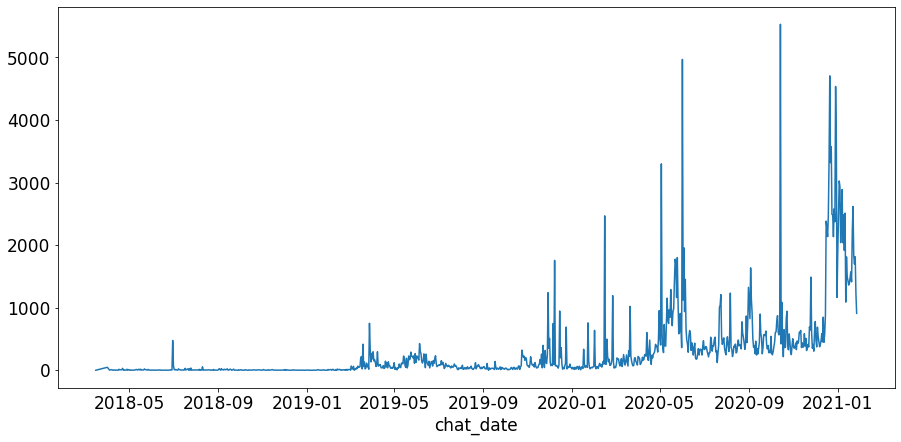

In [42]:
plt.figure(figsize = (15,7))

crypto_df.groupby(by = 'chat_date')['text'].count().plot()

<AxesSubplot:xlabel='chat_date'>

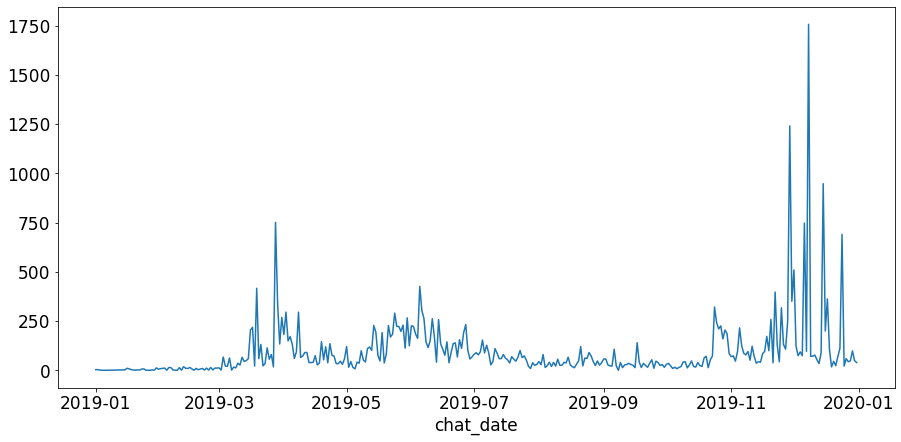

In [43]:
plt.figure(figsize = (15,7))

crypto_df[crypto_df['chat_year']=='2019'].groupby(by = 'chat_date')['text'].count().plot()

<AxesSubplot:xlabel='chat_date'>

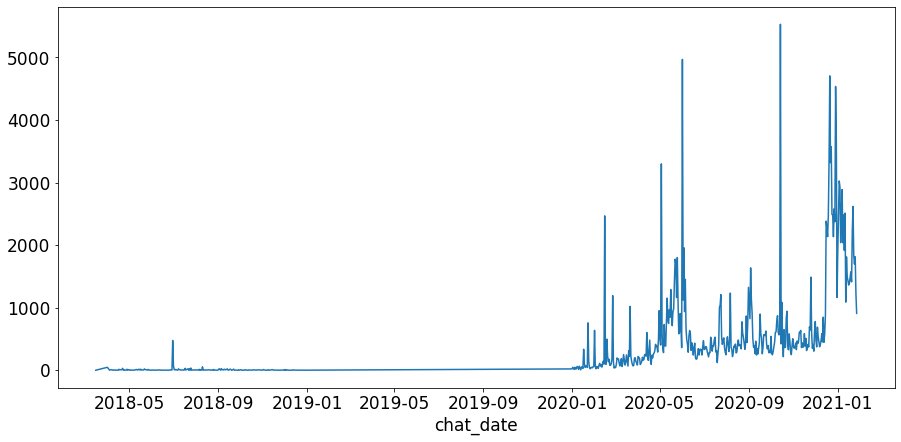

In [44]:
plt.figure(figsize = (15,7))

crypto_df[crypto_df['chat_year']!='2019'].groupby(by = 'chat_date')['text'].count().plot()

In [45]:

crypto_df.groupby(by = 'chat_date')['text'].count().sort_values(ascending = False)[:10]

chat_date
2020-10-14    5530
2020-06-01    4969
2020-12-21    4706
2020-12-29    4536
2020-12-30    3664
2020-12-23    3574
2020-12-20    3364
2020-12-22    3319
2020-05-03    3299
2021-01-03    3026
Name: text, dtype: int64

In [46]:
top_chat_days =  pd.DataFrame(crypto_df.groupby(by = 'chat_date')['text'].count().sort_values(ascending = False)[:10]).reset_index()
top_chat_days

,chat_date,text
0,2020-10-14,5530
1,2020-06-01,4969
2,2020-12-21,4706
3,2020-12-29,4536
4,2020-12-30,3664
5,2020-12-23,3574
6,2020-12-20,3364
7,2020-12-22,3319
8,2020-05-03,3299
9,2021-01-03,3026


<AxesSubplot:xlabel='chat_date', ylabel='text'>

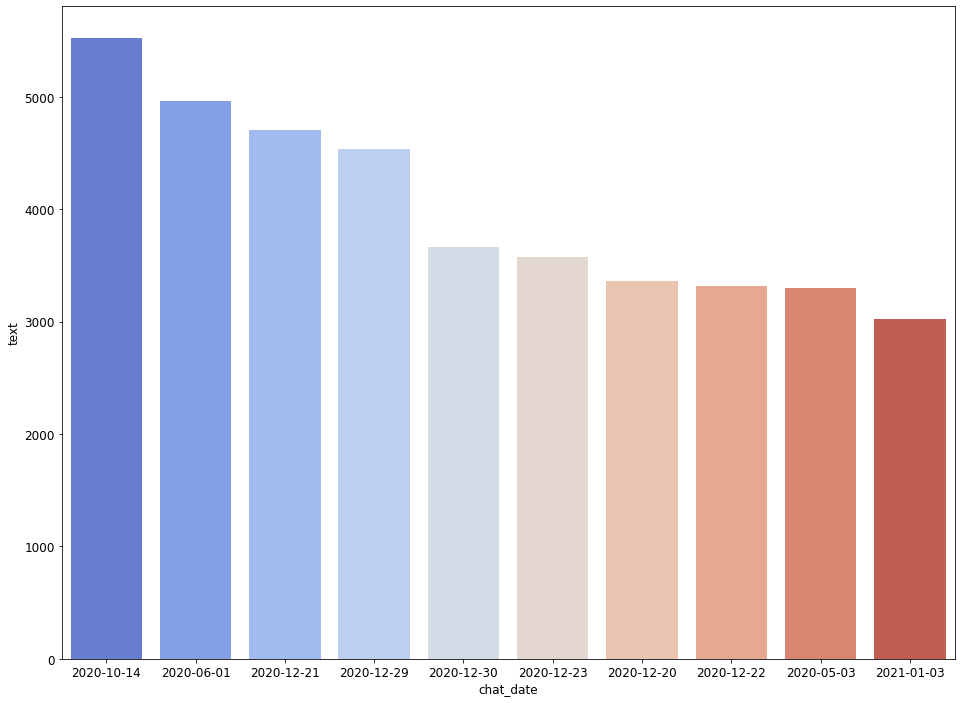

In [47]:
plt.rcParams['font.size'] = 12
sns.barplot(top_chat_days['chat_date'], top_chat_days['text'], palette = 'coolwarm')

#### Inference drawn

From the chat above we notice a trend in spike of chats during the december festive period than on other months of the year

We also notice that the group had very low chat engagement till later later in the first quarter of 2019. Could it be that people did not know of Binance then or there wasn't enough crypot education going on then as it is now

There also seem to be unusual spikes on certain days of the year, further analysis might be required to understand what events are driving that much chate engagement

## Top 10 active users on the group

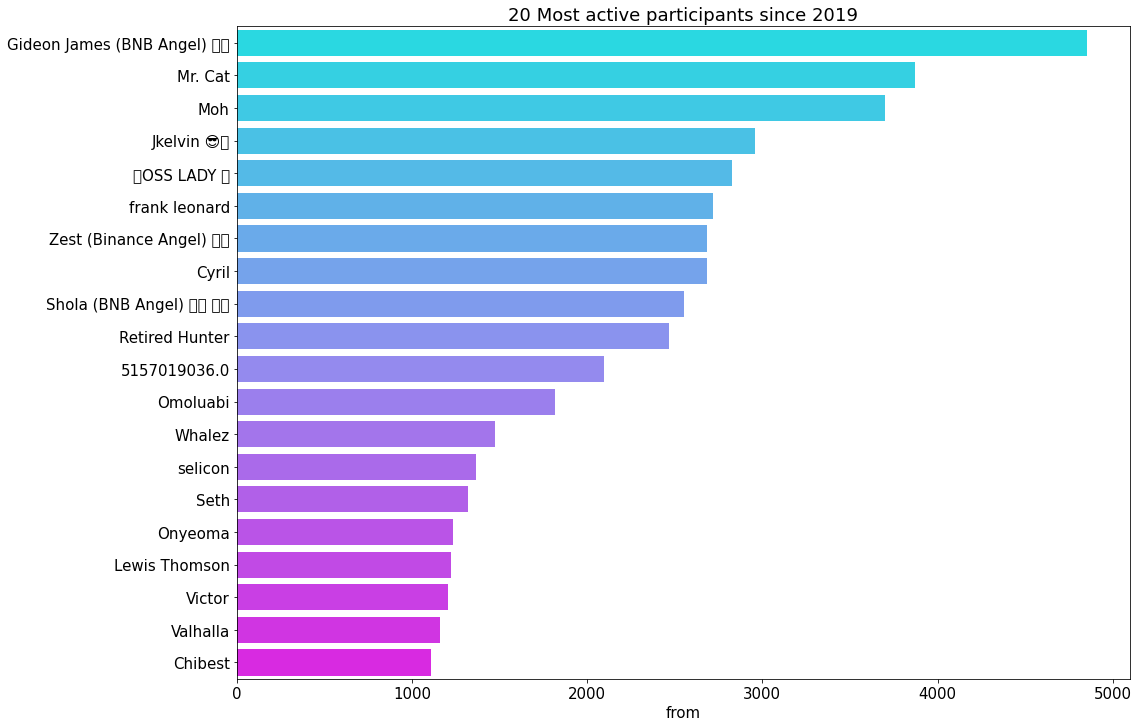

In [48]:
plt.rcParams['font.size'] = 15
data = crypto_df['from'].value_counts()[:20]
sns.barplot(data,data.index, orient = 'h', palette = 'cool')

plt.title('20 Most active participants since 2019');

In [49]:
crypto_df['from'].value_counts()[:20].index

Index(['Gideon James (BNB Angel) 🇳🇬',                     'Mr. Cat',
                               'Moh',                  'Jkelvin 😎💪',
                       '₿OSS LADY 👢',               'frank leonard',
           'Zest (Binance Angel) 🇳🇬',                       'Cyril',
           'Shola (BNB Angel) 🇳🇬 🇬🇧',              'Retired Hunter',
                        5157019036.0,                    'Omoluabi',
                            'Whalez',                     'selicon',
                              'Seth',                     'Onyeoma',
                     'Lewis Thomson',                      'Victor',
                          'Valhalla',                     'Chibest'],
      dtype='object')

### Days and time of the day with the most engagement

In [50]:
crypto_df.head()

,id,date,text,from,media_type,reply_to_message_id,chat_date,chat_time,chat_year,chat_month,chat_day,response_time,region_of_day
0,9,2018-03-16 18:40:21,Cool,4728344747.0,NaN,NaN,2018-03-16,18:40:21,2018,Mar,Fri,NaN,Eve
1,16,2018-04-01 10:05:54,We don dey grow smal smal,Cryptic Zombie,NaN,NaN,2018-04-01,10:05:54,2018,Apr,Sun,NaN,Morning
2,18,2018-04-01 10:07:16,Stop texting inside the Church😬,David,NaN,NaN,2018-04-01,10:07:16,2018,Apr,Sun,NaN,Morning
3,20,2018-04-01 10:07:49,Na ur shurch i go,Cryptic Zombie,NaN,NaN,2018-04-01,10:07:49,2018,Apr,Sun,NaN,Morning
4,22,2018-04-01 10:08:06,Hehehe,Cryptic Zombie,NaN,NaN,2018-04-01,10:08:06,2018,Apr,Sun,NaN,Morning


<AxesSubplot:xlabel='Chat Day', ylabel='chat_day'>

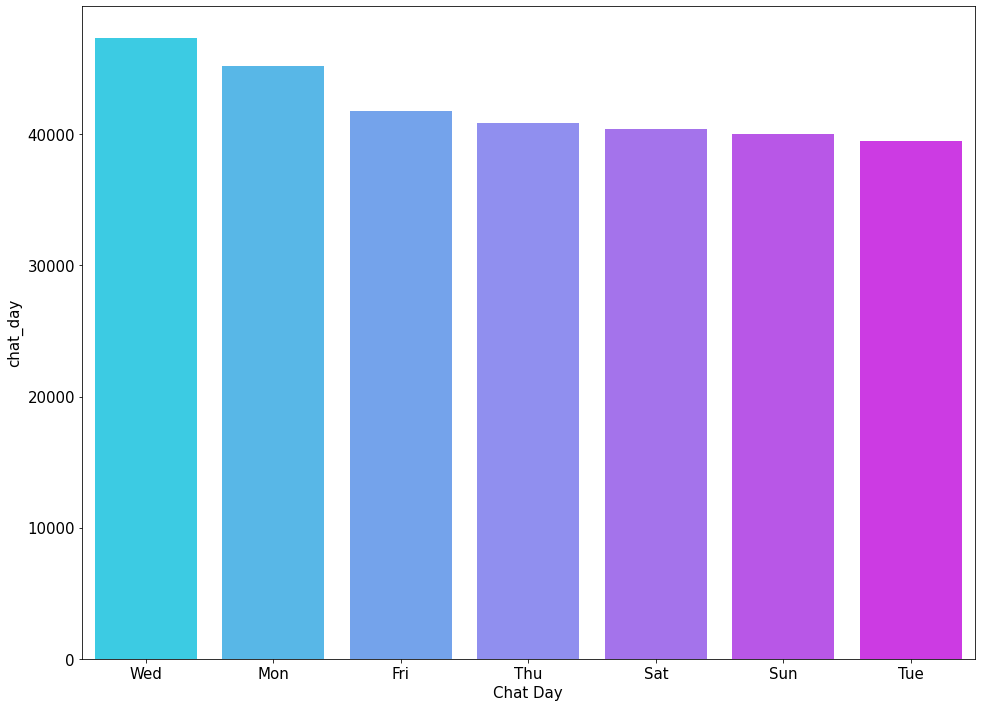

In [51]:
days_active = crypto_df['chat_day'].value_counts()
plt.xlabel('Chat Day')
plt.ylabel('Frequency of chat')
sns.barplot(days_active.index, days_active,palette = "cool")

<AxesSubplot:xlabel='Chat Month', ylabel='chat_month'>

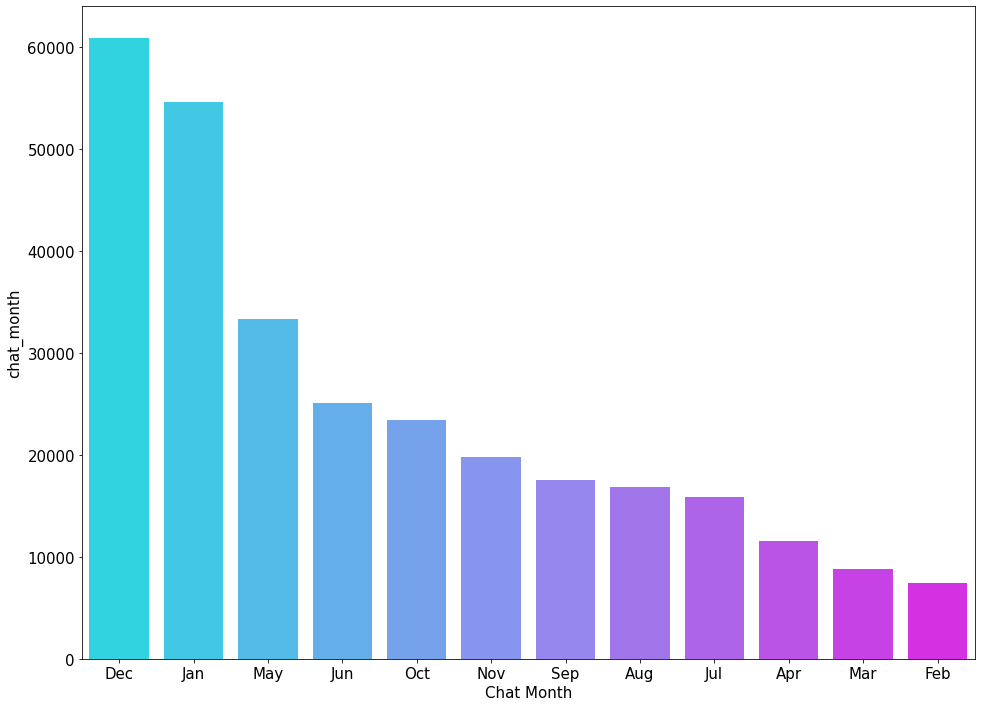

In [52]:
mnth_active = crypto_df['chat_month'].value_counts()
plt.xlabel('Chat Month')
plt.ylabel('Frequency of chat')
sns.barplot(mnth_active.index, mnth_active,palette = "cool")

##### Chat Month Frequency in the year 2019

<AxesSubplot:xlabel='Chat Month', ylabel='chat_month'>

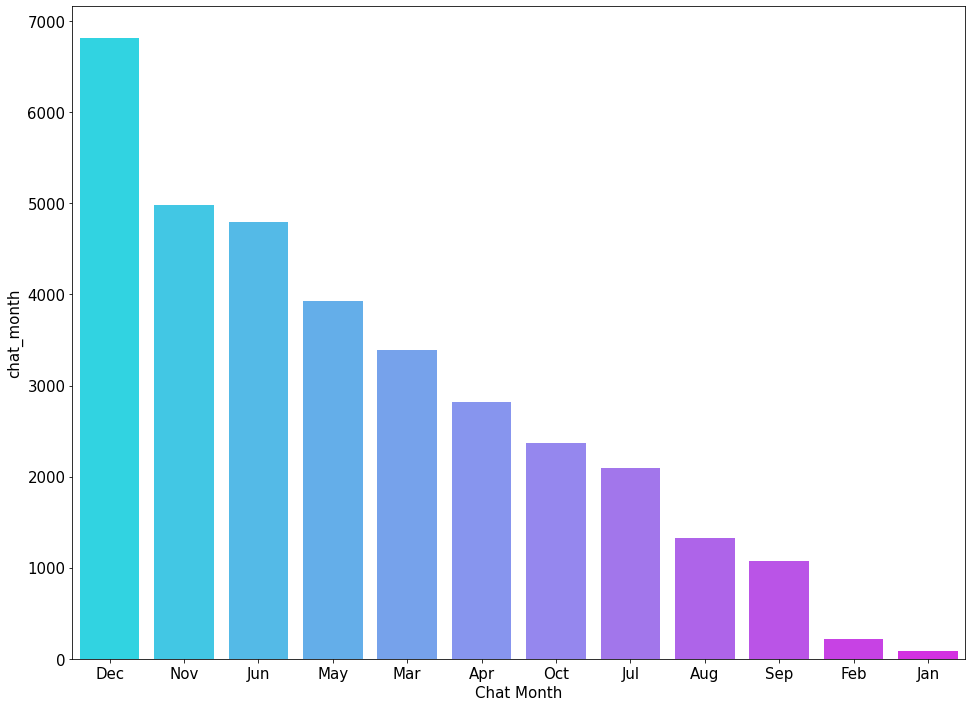

In [53]:
mnth_active = crypto_df[crypto_df['chat_year']== '2019']['chat_month'].value_counts()
plt.xlabel('Chat Month')
plt.ylabel('Frequency of chat')
sns.barplot(mnth_active.index, mnth_active,palette = "cool")

##### Chat month frequency from 2020 and beyond

<AxesSubplot:xlabel='Chat Month', ylabel='chat_month'>

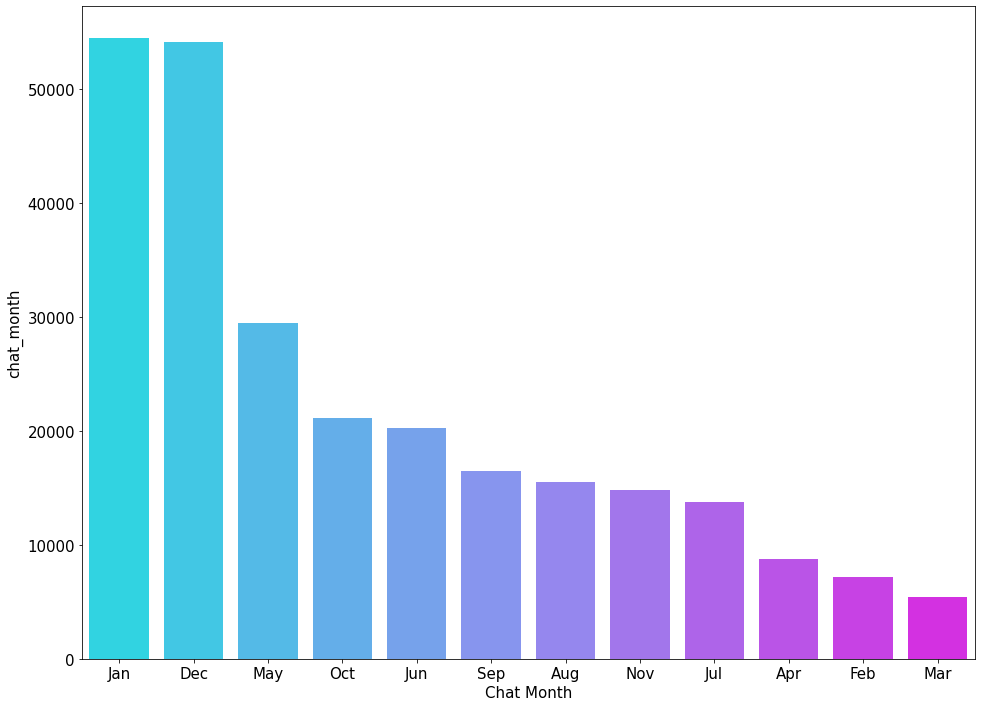

In [54]:
mnth_active = crypto_df[crypto_df['chat_year']!= '2019']['chat_month'].value_counts()
plt.xlabel('Chat Month')
plt.ylabel('Frequency of chat')
sns.barplot(mnth_active.index, mnth_active,palette = "cool")

<AxesSubplot:xlabel='Region of the Day', ylabel='region_of_day'>

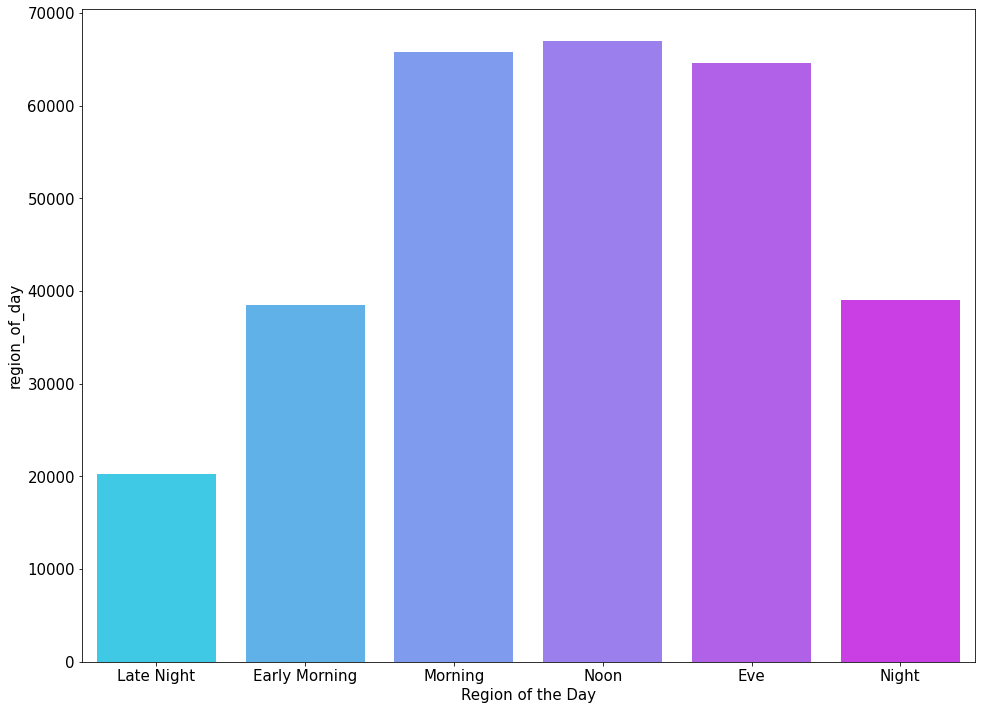

In [55]:
region_active = crypto_df['region_of_day'].value_counts()
plt.xlabel('Region of the Day')
sns.barplot(region_active.index, region_active,palette = "cool")

##### Users sending the most contents on the group

In [56]:
crypto_df['txt_len'] = crypto_df['text'].apply(lambda x: len(x))

crypto_df.head()

,id,date,text,from,media_type,reply_to_message_id,chat_date,chat_time,chat_year,chat_month,chat_day,response_time,region_of_day,txt_len
0,9,2018-03-16 18:40:21,Cool,4728344747.0,NaN,NaN,2018-03-16,18:40:21,2018,Mar,Fri,NaN,Eve,4
1,16,2018-04-01 10:05:54,We don dey grow smal smal,Cryptic Zombie,NaN,NaN,2018-04-01,10:05:54,2018,Apr,Sun,NaN,Morning,25
2,18,2018-04-01 10:07:16,Stop texting inside the Church😬,David,NaN,NaN,2018-04-01,10:07:16,2018,Apr,Sun,NaN,Morning,31
3,20,2018-04-01 10:07:49,Na ur shurch i go,Cryptic Zombie,NaN,NaN,2018-04-01,10:07:49,2018,Apr,Sun,NaN,Morning,17
4,22,2018-04-01 10:08:06,Hehehe,Cryptic Zombie,NaN,NaN,2018-04-01,10:08:06,2018,Apr,Sun,NaN,Morning,6


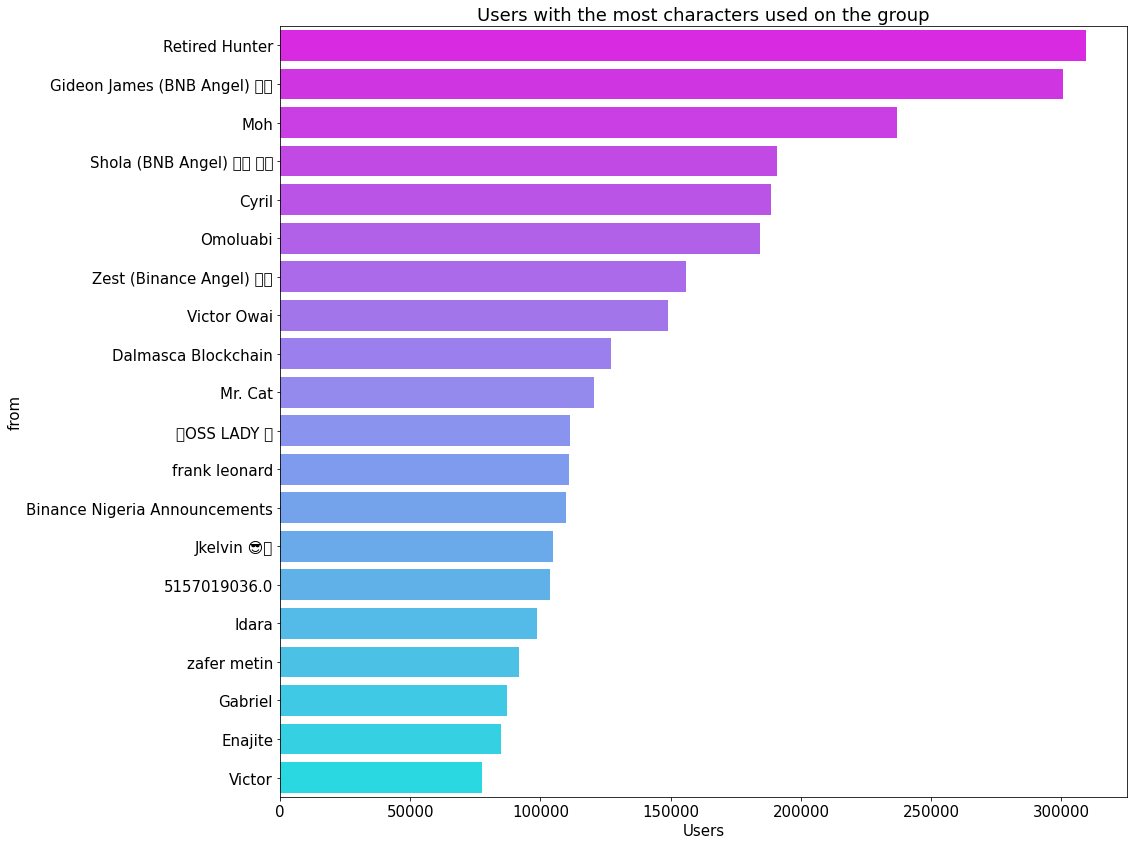

In [57]:
content_kings = (crypto_df.groupby(by = 'from')['txt_len'].sum().sort_values(ascending = False)[:20]).reset_index()
content_kings['from'] = content_kings['from'].astype('str')
sns.barplot(content_kings['txt_len'],content_kings['from'], palette = 'cool_r', orient = 'h')
plt.xlabel('Users')
plt.title('Users with the most characters used on the group')

plt.tight_layout()

In [58]:
crypto_df.groupby(['chat_year', 'chat_day','region_of_day']).count()

id  date  text  from  media_type  \
chat_year chat_day region_of_day                                       
2018      Fri      Late Night       14    14    14    14           0   
                   Early Morning    49    49    49    49           0   
                   Morning          74    74    74    74           0   
                   Noon             44    44    44    44           0   
                   Eve              37    37    37    37           0   
...                                ...   ...   ...   ...         ...   
2021      Wed      Early Morning  1198  1198  1198  1198           1   
                   Morning        1772  1772  1772  1772           1   
                   Noon           1306  1306  1306  1306           0   
                   Eve             950   950   950   950           0   
                   Night           851   851   851   851           0   

                                  reply_to_message_id  chat_date  chat_time  \
chat_year chat_day region_of_day                                              
2018      Fri      Late Night                       5         14         14   
                   Early Morning                   16         49         49   
                   Morning                         14         74         74   
                   Noon                            11         44         44   
                   Eve                             10         37         37   
...                                               ...        ...        ...   
2021      Wed      Early Morning                  732       1198       1198   
                   Morning                       1157       1772       1772   
                   Noon                           793       1306       1306   
                   Eve                            590        950        950   
                   Night                          496        851        851   

                                  chat_month  response_time  txt_len  
chat_year chat_day region_of_day                                      
2018      Fri      Late Night             14              5       14  
                   Early Morning          49             14       49  
                   Morning                74             14       74  
                   Noon                   44              5       44  
                   Eve                    37              8       37  
...                                      ...            ...      ...  
2021      Wed      Early Morning        1198            662     1198  
                   Morning              1772           1062     1772  
                   Noon                 1306            695     1306  
                   Eve                   950            549      950  
                   Night                 851            457      851  

[168 rows x 11 columns]

In [59]:
crypto_df.groupby(['chat_year', 'chat_day','region_of_day']).count()

id  date  text  from  media_type  \
chat_year chat_day region_of_day                                       
2018      Fri      Late Night       14    14    14    14           0   
                   Early Morning    49    49    49    49           0   
                   Morning          74    74    74    74           0   
                   Noon             44    44    44    44           0   
                   Eve              37    37    37    37           0   
...                                ...   ...   ...   ...         ...   
2021      Wed      Early Morning  1198  1198  1198  1198           1   
                   Morning        1772  1772  1772  1772           1   
                   Noon           1306  1306  1306  1306           0   
                   Eve             950   950   950   950           0   
                   Night           851   851   851   851           0   

                                  reply_to_message_id  chat_date  chat_time  \
chat_year chat_day region_of_day                                              
2018      Fri      Late Night                       5         14         14   
                   Early Morning                   16         49         49   
                   Morning                         14         74         74   
                   Noon                            11         44         44   
                   Eve                             10         37         37   
...                                               ...        ...        ...   
2021      Wed      Early Morning                  732       1198       1198   
                   Morning                       1157       1772       1772   
                   Noon                           793       1306       1306   
                   Eve                            590        950        950   
                   Night                          496        851        851   

                                  chat_month  response_time  txt_len  
chat_year chat_day region_of_day                                      
2018      Fri      Late Night             14              5       14  
                   Early Morning          49             14       49  
                   Morning                74             14       74  
                   Noon                   44              5       44  
                   Eve                    37              8       37  
...                                      ...            ...      ...  
2021      Wed      Early Morning        1198            662     1198  
                   Morning              1772           1062     1772  
                   Noon                 1306            695     1306  
                   Eve                   950            549      950  
                   Night                 851            457      851  

[168 rows x 11 columns]

In [60]:

active_time_by_day = crypto_df[crypto_df['chat_year']=='2020'].groupby(['chat_day', 'region_of_day']).count()['text'].reset_index()

pivot_atd = active_time_by_day.pivot_table(index = 'chat_day', columns = 'region_of_day', values = 'text')

pivot_atd

region_of_day,Late Night,Early Morning,Morning,Noon,Eve,Night
chat_day,,,,,,
Fri,2926,3213,5798,5824,6263,3593
Mon,1596,3788,6153,10542,6057,4209
Sat,1913,2967,7049,7303,5009,3645
Sun,1780,3109,7345,4451,5217,3297
Thu,2085,3772,6575,5818,7111,4288
Tue,2145,4683,6510,5685,5153,3702
Wed,1753,4400,7079,6689,11870,4832


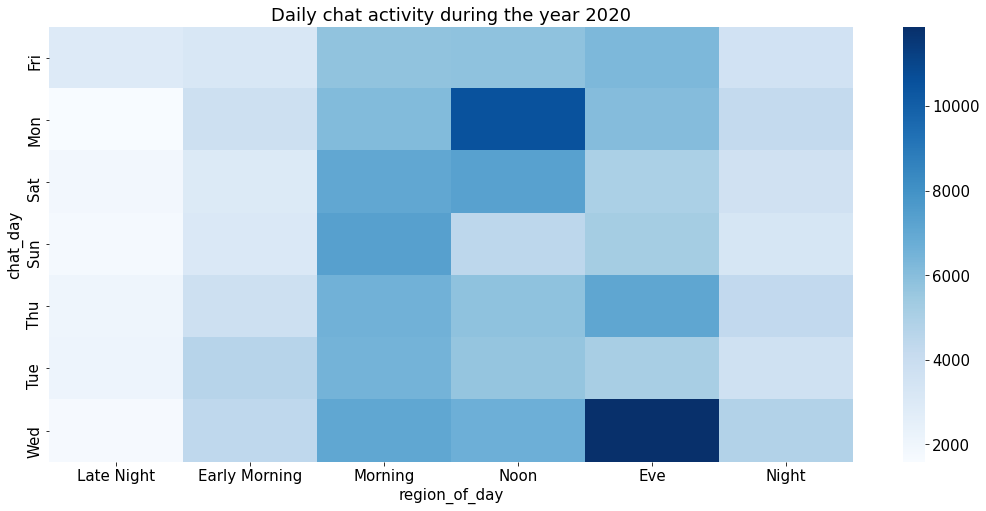

In [61]:
plt.figure(figsize = (18,8))
plt.title('Daily chat activity during the year 2020')
sns.heatmap(pivot_atd, cmap = 'Blues');

#### Inferences

From the above plots, we can infer that people are mostly chatting during the wake period of the day from 8 am-8 pm

Chats activities are most at the December festive period of the year. It seems that people were chatting as much on every other day. Mostly on the weekdays

The heat map reveals that the group was usually active on Wednesday evening from the period of 4pm - 8pm.

More insight is needed to understand what events prompts this. Could this be a time for crypto education or what excatly could be responsible for this spike in chat activity.


#### Media dataframe EDA

In [62]:
media_df.head()

,id,date,text,from,media_type,reply_to_message_id
13,17,2018-04-01T10:06:01,,Cryptic Zombie,sticker,NaN
17,21,2018-04-01T10:07:52,,Cryptic Zombie,sticker,NaN
21,25,2018-04-01T10:08:33,,Cryptic Zombie,sticker,NaN
28,32,2018-04-01T10:13:30,,Cryptic Zombie,sticker,NaN
31,35,2018-04-01T10:14:29,,Cryptic Zombie,sticker,NaN


In [63]:
media_df.media_type.value_counts()

sticker          4001
animation        3450
video_file        627
audio_file          5
video_message       2
Name: media_type, dtype: int64

<AxesSubplot:xlabel='media_type', ylabel='from'>

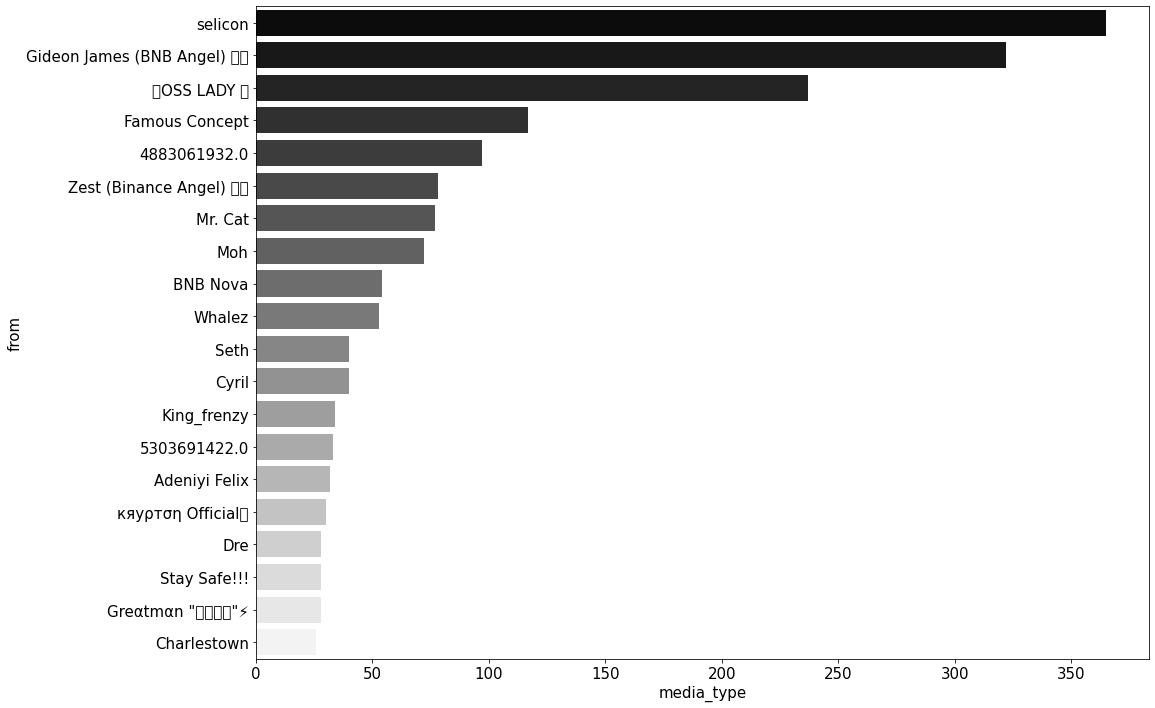

In [64]:
sticker_lord = media_df[media_df['media_type'] == 'sticker'].groupby('from')['media_type'].count().sort_values(ascending = False).reset_index()
sticker_lord = sticker_lord.iloc[:20,:]
sns.barplot(sticker_lord['media_type'], sticker_lord['from'], palette = 'binary_r', orient = 'h')

<AxesSubplot:xlabel='media_type', ylabel='from'>

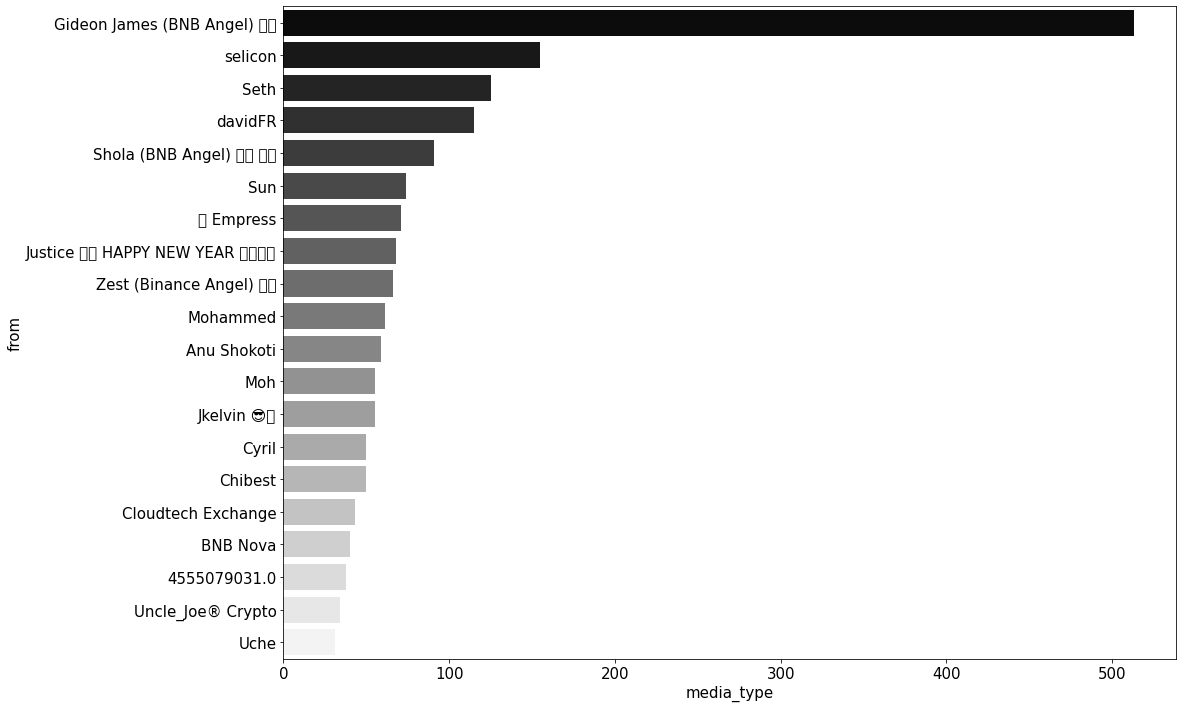

In [65]:
anim_lord = media_df[media_df['media_type'] == 'animation'
                    ].groupby('from')['media_type'].count().sort_values(ascending = False).reset_index()
anim_lord = anim_lord.iloc[:20,:]
sns.barplot(anim_lord['media_type'], anim_lord['from'], palette = 'binary_r', orient = 'h')

In [66]:
media_df.groupby('from')['media_type'].count().sort_values(ascending = False)[:20].reset_index()

,from,media_type
0,Gideon James (BNB Angel) 🇳🇬,848
1,selicon,521
2,Binance Community Bot,383
3,₿OSS LADY 👢,256
4,Seth,165
5,Zest (Binance Angel) 🇳🇬,149
6,Moh,130
7,Famous Concept,120
8,davidFR,119
9,4883061932.0,108


<AxesSubplot:ylabel='from'>

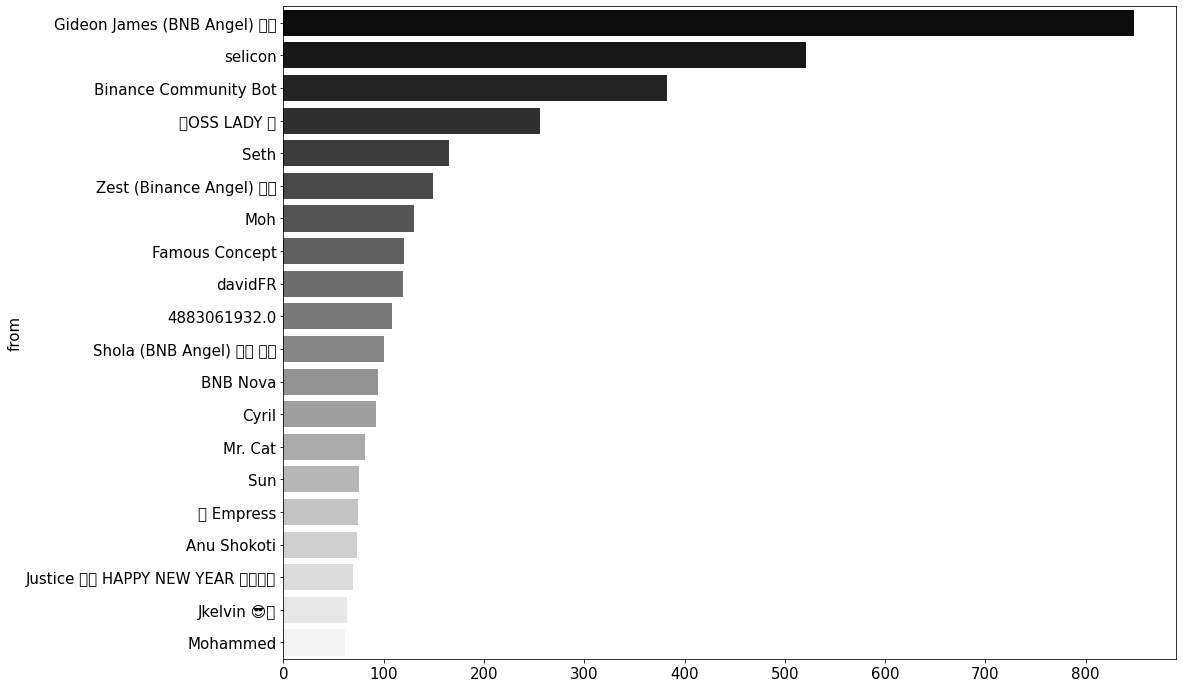

In [67]:
media_rex = media_df.groupby('from')['media_type'].count().sort_values(ascending = False)[:20]


sns.barplot(media_rex.values, media_rex.index, orient = 'h', palette = 'binary_r')

### Analysis of word used

I'd be interested in knowing what is being discussed in each year and also during periods when there is activity spike in the group

##### First we check what is have been talked about the most in the group since 2019

In [68]:
messages = ' '.join(text.lower() for text in crypto_df['text'])

stopwords = set(STOPWORDS)

wordcloud = WordCloud(width = 800, height = 400,
                      background_color = 'white',
                     stopwords = stopwords,
                     min_font_size = 10,
                     ).generate(messages)

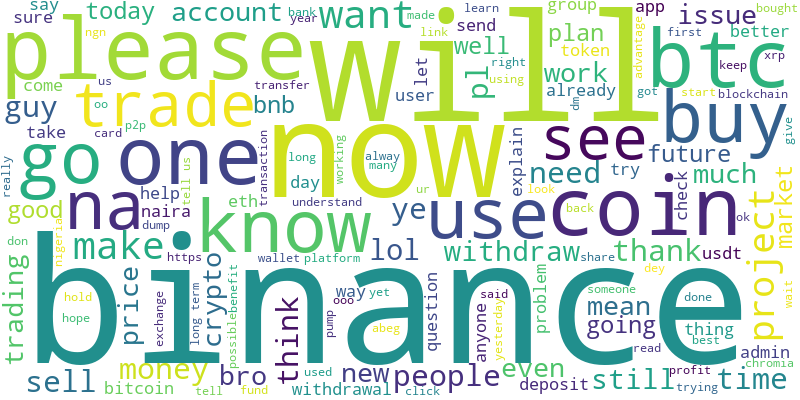

In [69]:
wordcloud.to_image()

#### Chart Pattern for the year 2019

In [70]:
message19 = ' '.join(text.lower() for text in crypto_df[crypto_df['chat_year']=='2019']['text'])

stopwords = set(STOPWORDS)

wordcloud19 = WordCloud(width = 800, height = 400,
                      background_color = 'white',
                     stopwords = stopwords,
                     min_font_size = 10,
                     ).generate(message19)

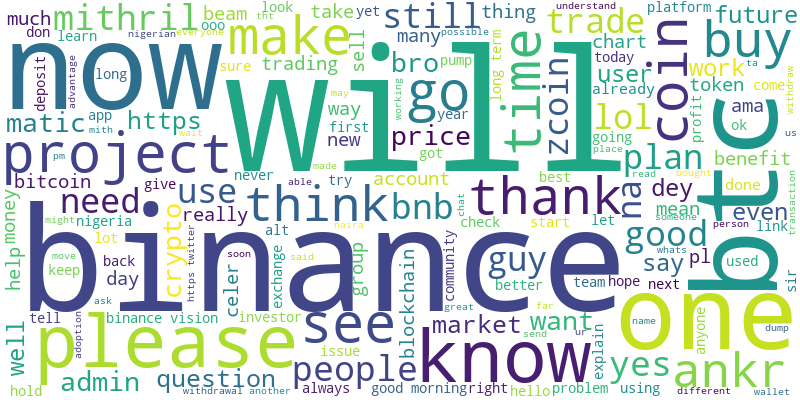

In [71]:
wordcloud19.to_image()

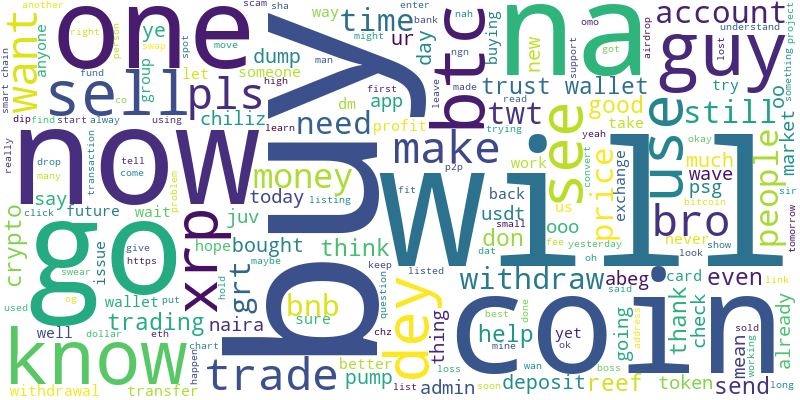

In [72]:
msg_dec = ' '.join(text.lower() for text in crypto_df[(crypto_df['chat_month'] 
                                                         =='Dec') & (crypto_df['chat_year'] == '2020')]['text'])

msg_dec.replace('bitcoin', 'btc')
stopwords = STOPWORDS.update(['please', 'binance', 'lol', ])
#stopwords = set(stopwords)

wc_dec = WordCloud(width = 800, height = 400,
                      background_color = 'white',
                     stopwords = stopwords,
                     min_font_size = 10,
                     ).generate(msg_dec)
wc_dec.to_image()

#### Chart Pattern for 2020 and 2021

In [73]:
message21 = ' '.join(text.lower() for text in crypto_df[crypto_df['chat_year']!='2019']['text'])

stopwords = set(STOPWORDS)

wordcloud21 = WordCloud(width = 800, height = 400,
                      background_color = 'white',
                     stopwords = stopwords,
                     min_font_size = 10,
                     ).generate(message21)

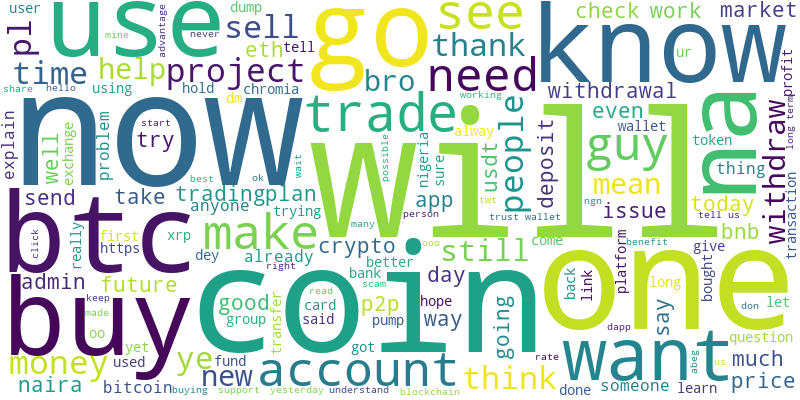

In [74]:
wordcloud21.to_image()

 Wednesday Evenings

December periods

top users and top days

finally crypto contained word

### Topics of Discussion on The the most active day and period of day

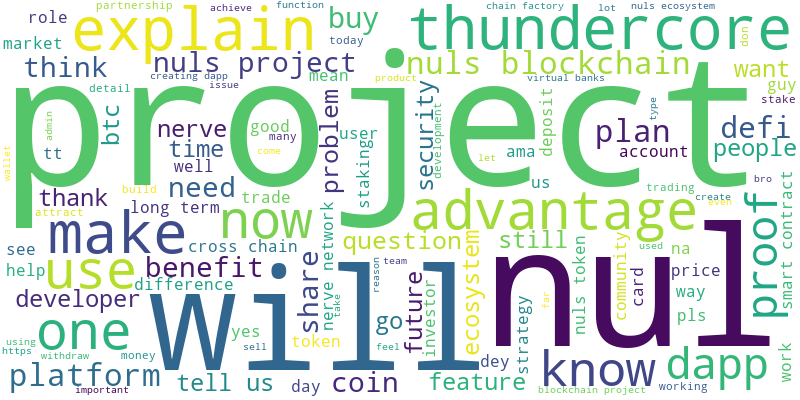

In [75]:
msg_wedeve = ' '.join(text.lower() for text in crypto_df[(crypto_df['chat_day'] 
                                                         =='Wed') & (crypto_df['region_of_day'] == 'Eve')]['text'])

stopwords = set(STOPWORDS)

wc_wedeve = WordCloud(width = 800, height = 400,
                      background_color = 'white',
                     stopwords = stopwords,
                     min_font_size = 10,
                     ).generate(msg_wedeve)
wc_wedeve.to_image()

#### Inference

It is likely new project coincidentally are pushed to the group at this time of the day as we can see topics of discussion such as
- 'project'
- 'stake'
- 'proof'
- 'partnership'
- 'smart contract'

Thundercore token also seem to have been a topic of discussion at some point in time on such evenings

### What discussions causes spike in activities by close of the year


In [76]:
crypto_terms = list(map(lambda x: x.lower(), crypto_terms))

terms_cloud = ' '.join(term for term in crypto_terms)

coin_cloud = ' '.join(coin.lower() for coin in coin_df['coin_tag'])


all_terms = coin_cloud + ' ' + terms_cloud

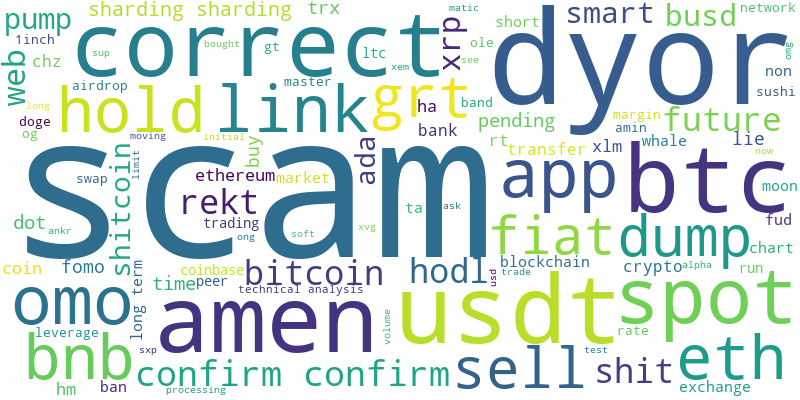

In [77]:


cryptic_msg = ' '.join(text.lower() for text in crypto_df['text'] if text.lower() in all_terms)

cryptic_msg.replace('bitcoin', 'btc')

stopwords = STOPWORDS.update(['please', 'binance', 'lol', ])
#stopwords = set(stopwords)

wc_crypto = WordCloud(width = 800, height = 400,
                      background_color = 'white',
                     stopwords = stopwords,
                     min_font_size = 10,
                     ).generate(cryptic_msg)
wc_crypto.to_image()

In [78]:
coin_msg = ' '.join(text.lower() for text in crypto_df['text'] if text.lower() in coin)

coin_msg.replace('bitcoin', 'btc')

stopwords = STOPWORDS.update(['please', 'binance', 'lol', ])
#stopwords = set(stopwords)

wc_crypto = WordCloud(width = 800, height = 400,
                      background_color = 'white',
                     stopwords = stopwords,
                     min_font_size = 10,
                     ).generate(cryptic_msg)
wc_crypto.to_image()

NameError: name 'coin' is not defined

In [79]:
cpy_df = crypto_df
cpy_df['text'] = cpy_df['text'].apply(lambda x: coin_df[coin_df['coin_name'] == x.lower()]['coin_tag'].lower() if x.lower() in coin_df['coin_name'] else x)
coin_msg = ' '.join(text.lower() for text in cpy_df['text'] if text.lower() in coin_cloud)

In [80]:
coin_df[coin_df['coin_name'] == 'Bitcoin'.lower()]

,coin_id,coin_name,coin_tag
0,1,bitcoin,BTC


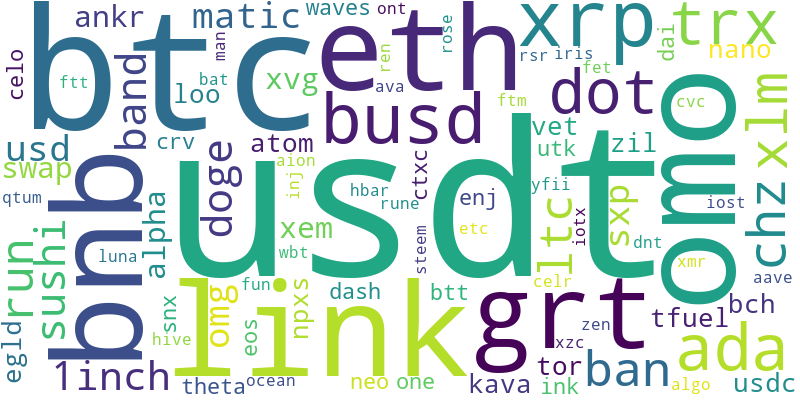

In [81]:
cpy_df = crypto_df
coin_msg = ' '.join(text.lower() for text in cpy_df['text'])


base_func = lambda x: coin_df[coin_df['coin_name'] == x.lower()]['coin_tag'].lower() if x.lower() in coin_df['coin_name'] else x

coin_msg = list(map(base_func, coin_msg.split(' ')))


coin_msg = ' '.join(text.lower() for text in cpy_df['text'] if (text.lower() in coin_cloud) & (len(text) > 2))

stopwords = set(STOPWORDS)

stopwords = STOPWORDS.update(['true', 'abi'])

wc_crypto = WordCloud(width = 800, height = 400,
                      background_color = 'white',
                     stopwords = stopwords,
                     min_font_size = 10,
                     ).generate(coin_msg)
wc_crypto.to_image()